Akshay Zaveri, Dheeraj Banala, Arav Parikh

MATH 3094 - Mathematics of Machine Learning

Final Project

## Dataset

We selected the following dataset: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records published by Davide Chicco and Giuseppe Jurman in the journal BMC Medical Informatics and Decision Making in 2020. The goal of this dataset is to predict mortality for patients with heart failure given certain pieces of relevant clinical information.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print(f"Length of Dataset: {len(df)}")
print(f"Number of Columns: {len(df.columns)}")

Length of Dataset: 299
Number of Columns: 13


The dataset has 299 instances (patients) each with 13 attributes

Feature Attributes:
- anemia, diabetes, high blood pressure, smoking (Boolean encoded as integer)
- sex (binary encoded as integers)
- age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine, serum sodium, time (real/integer)

Target Attribute:
- death event (Boolean encoded as integer) --> did the patient die in the follow-up time frame given by time attribute

In [4]:
from sklearn.model_selection import train_test_split

y = df.pop('DEATH_EVENT')
X = df 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
norm_X = mm.fit_transform(X)
norm_df = pd.DataFrame(norm_X, columns=df.columns)

norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(norm_X, y, test_size=0.25, random_state=1)

In [6]:
print(f"Shape of Training Data {X_train.shape}, Shape of Training Labels: {y_train.shape}")
print(f"Shape of Testing Data {X_test.shape}, Shape of Testing Labels: {y_test.shape}")

Shape of Training Data (224, 12), Shape of Training Labels: (224,)
Shape of Testing Data (75, 12), Shape of Testing Labels: (75,)


To summarize our findings from last time, we found that out of the the four total classifiers we trained, logistic regression performed the best on the testing data in terms of accuracy. By performing PCA, examining the logistic regression coefficients, and performing basic statistical analysis on the data, we also determined that the most important features in predicting mortality from heart disease were age, serum_creatinine, ejection_fraction, and time. These findings were further supported by the paper published by the creators of the original dataset.

Working with the same dataset again, our goal this time was to not only introduce the additional algorithms we learned in class, but also more closely follow the best practices associated with the algorithms we chose last time. In other words, we made several dangerous assumptions about our data last time and wanted to validate them this time around before proceeding with the training process.

## Logistic Regression

We first modeled the data with the logistic regression algorithm since the binary classification nature of this problem is something that logistic regression handles quite well. Instead of fitting the model with all 12 features this time, we only passed in the continuous features as is recommended when using logistic regression.

In [7]:
log_reg_X = norm_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine', 'time']]
log_reg_X_train, log_reg_X_test, log_reg_y_train, log_reg_y_test = train_test_split(log_reg_X, y, test_size=0.25, random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(log_reg_X_train, log_reg_y_train)
print(f"Logistic Regression Test Accuracy: {log_reg.score(log_reg_X_test, log_reg_y_test)}")

Logistic Regression Test Accuracy: 0.8933333333333333


### Coefficients

We looked at the coefficients for each of the features after training the logistic regression as a means of gaining some insight into which features matter the most in predicting patient mortality.

In [9]:
coefs = log_reg.coef_
for i in range(len(list(log_reg_X.columns))):
  print(f"{list(log_reg_X.columns)[i]} Coefficient: {round(coefs[0][i], 4)}")

age Coefficient: 1.2557
creatinine_phosphokinase Coefficient: 0.6304
ejection_fraction Coefficient: -1.6571
platelets Coefficient: -0.5088
serum_sodium Coefficient: -0.7306
serum_creatinine Coefficient: 1.8724
time Coefficient: -3.2601


As shown above, the age, ejection_fraction, serum_creatinine, and time features had coefficients with the greatest magnitudes and were, as a result, valued the most for predictors of whether a patient would survive or not, supporting our findings from last time.

### Confusion Matrix

This matrix shows the counts of true and false positives and negatives for the predictions made by logistic regression. We also included statistics for precision and recall which provide insight into the model's performance. The recall value indicates how good the model is at correctly identifying positives, and the precision value indicates how good the model is at not misclassifying negatives as positives.

Recall: 0.65
Precision: 0.9285714285714286


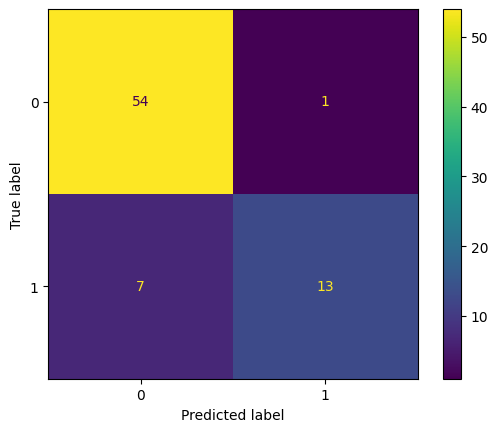

In [10]:
l_y_pred = log_reg.predict(log_reg_X_test)
l_conf_matrix = confusion_matrix(log_reg_y_test, l_y_pred)
l_cmd = ConfusionMatrixDisplay(l_conf_matrix)
l_recall = recall_score(log_reg_y_test, l_y_pred)
l_prec = precision_score(log_reg_y_test, l_y_pred)
l_cmd.plot()
print("Recall: " + str(l_recall))
print("Precision: " + str(l_prec))

Recall: 0.85
Precision: 0.5


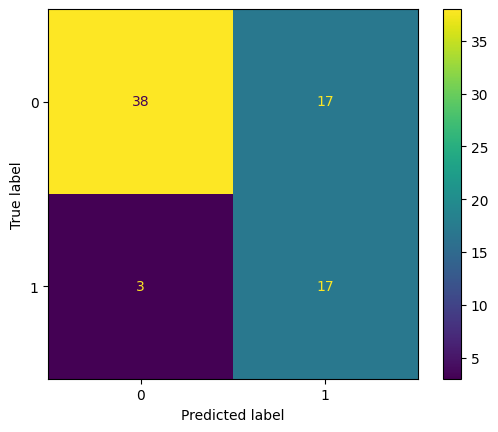

In [11]:
THRESHOLD = 0.3
l_y_pred2 = np.where(log_reg.predict_proba(log_reg_X_test)[:, 1] > THRESHOLD, 1, 0)
l_conf_matrix2 = confusion_matrix(log_reg_y_test, l_y_pred2)
l_cmd2 = ConfusionMatrixDisplay(l_conf_matrix2)
l_recall2 = recall_score(log_reg_y_test, l_y_pred2)
l_prec2 = precision_score(log_reg_y_test, l_y_pred2)
l_cmd2.plot()
print("Recall: " + str(l_recall2))
print("Precision: " + str(l_prec2))

### ROC-AUC Curve

This receiver operator characteristic (ROC) curve plots the true positive rate (TPR = sensitivity) against the false positive rate (FPR = 1 - specificity) at different classification thresholds for logistic regression. The TPR is the proportion of true positives that are correctly identified while the FPR is the proportion of true negatives that are identified as positives. The resulting area under curve (AUC) score is roughly the probability that the model ranks a random positive more highly than a random negative and, accordingly, ranges from 0 to 1.

An ideal ROC curve forms a right angle in the top left corner and yields an AUC score of 1 while a mediocre ROC curve slices diagonally from the bottom left to the top right and yields an AUC of 0.5.

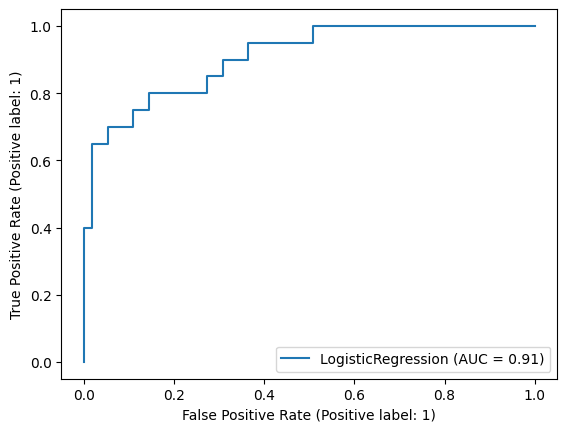

In [12]:
RocCurveDisplay.from_estimator(log_reg, log_reg_X_test, log_reg_y_test)
print('')

## Naive Bayes

We also decided to model the data with the popular Bernoulli and Gaussian variants of the Naive Bayes classifier. Once again, instead of fitting the three Naive Bayes models with all 12 features this time, we were more selective in our approach. For example, we only passed in the binary features to the Bernoulli variant and plotted all the feature distributions prior to fitting the Gaussian variant in order to assess which features were truly normally distributed. We also chose to forego using the Multinomial variant since none of our features specify event frequencies.

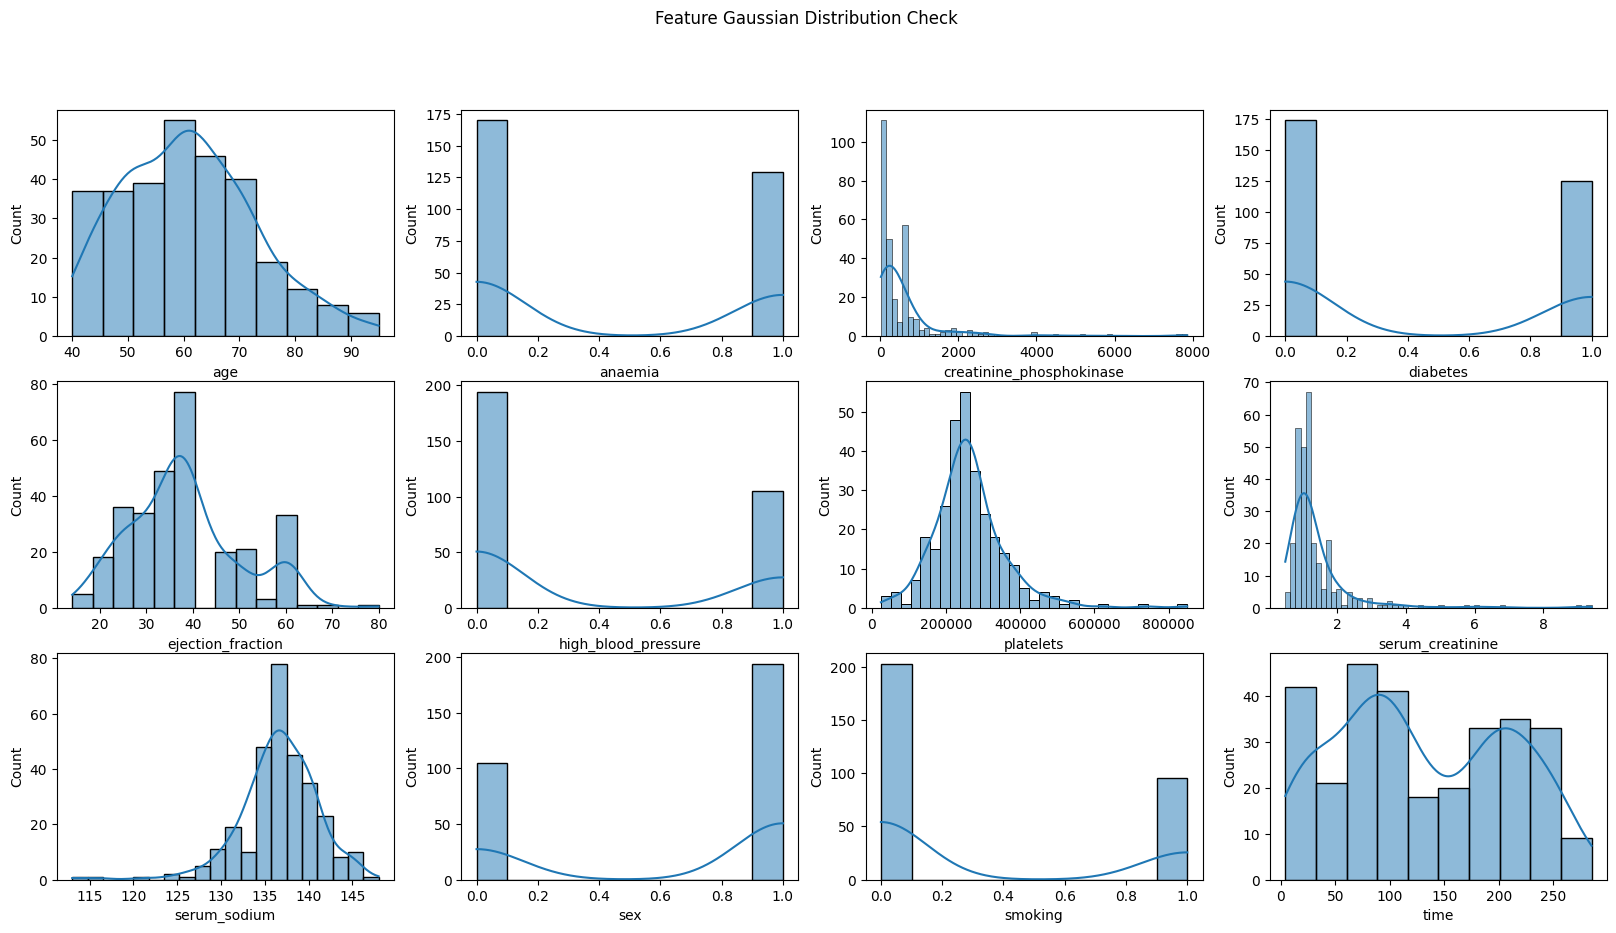

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
fig.suptitle('Feature Gaussian Distribution Check')
i = 0
j = 0
for col in list(df.columns):
  if j == 4:
    i += 1
    j = 0
  _ = sns.histplot(df, x=col, kde=True, ax=axes[i][j])
  #_ = sns.kdeplot(norm_df, x=col, ax=axes[i][j], color='r')
  #_ = sns.kdeplot(scaled_df, x=col, ax=axes[i][j], color='g')
  j += 1

In [14]:
gnb_X1 = df[['age', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine']]
gnb_X1_train, gnb_X1_test, gnb_y1_train, gnb_y1_test = train_test_split(gnb_X1, y, test_size=0.25, random_state=1)

gnb_X2 = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine', 'time']]
gnb_X2_train, gnb_X2_test, gnb_y2_train, gnb_y2_test = train_test_split(gnb_X2, y, test_size=0.25, random_state=1)

bnb_X = df[['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking']]
bnb_X_train, bnb_X_test, bnb_y_train, bnb_y_test = train_test_split(bnb_X, y, test_size=0.25, random_state=1)

In [15]:
from sklearn.naive_bayes import *

bnb = BernoulliNB()
bnb.fit(bnb_X_train, bnb_y_train)
print(f"Bernoulli Naive Bayes Test Accuracy: {bnb.score(bnb_X_test, bnb_y_test)}")

gnb1 = GaussianNB()
gnb1.fit(gnb_X1_train, gnb_y1_train)
print(f"Gaussian Naive Bayes Test Accuracy (Normally-Distributed Features): {gnb1.score(gnb_X1_test, gnb_y1_test)}")

gnb2 = GaussianNB()
gnb2.fit(gnb_X2_train, gnb_y2_train)
print(f"Gaussian Naive Bayes Test Accuracy (All Continuous Features): {gnb2.score(gnb_X2_test, gnb_y2_test)}")

Bernoulli Naive Bayes Test Accuracy: 0.7333333333333333
Gaussian Naive Bayes Test Accuracy (Normally-Distributed Features): 0.76
Gaussian Naive Bayes Test Accuracy (All Continuous Features): 0.8533333333333334


Recall: 0.5
Precision: 0.9090909090909091


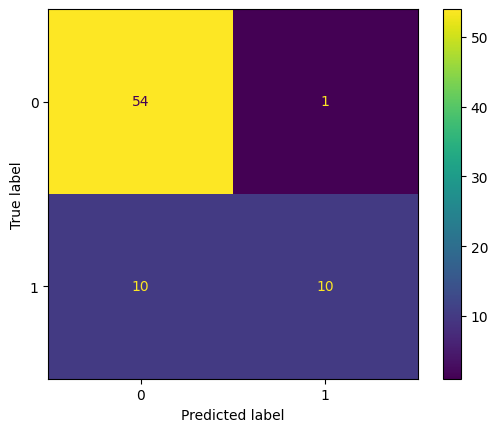

In [16]:
g_y2_pred = gnb2.predict(gnb_X2_test)
g_conf_matrix = confusion_matrix(gnb_y2_test, g_y2_pred)
g_cmd = ConfusionMatrixDisplay(g_conf_matrix)
g_recall = recall_score(gnb_y2_test, g_y2_pred)
g_prec = precision_score(gnb_y2_test, g_y2_pred)
g_cmd.plot()
print("Recall: " + str(g_recall))
print("Precision: " + str(g_prec))

## Support Vector Machine

Adding on to our work from last time, we decided to utilize a support vector classifier to model the data since the binary classification nature of this problem is something that support vector machines (SVMs) also handle quite well. Unfortunately, though, it was more difficult to validate how suitable the data is for this algorithm in terms of the separability of the combined 12 features (or any subset of more than 3 features) since visualizing a high-dimensional feature space is not all that feasible. There is, however, a tendency for SVMs to work better at higher dimensions so we chose to proceed with the modeling of the entire set of features with this in mind.

In an attempt to show the inner workings of the SVM model and gauge the effectiveness of some of the aforementioned critical features, we also fit our model with just 2 features so as to not only assess the separability of the features, but visualize the resulting decision boundary and gain some insight into our modeling.

In order to choose 2 features that would work well with the SVM, we used a pairplot that is color-coded by the target feature, in this case death, to see which scatter plots appeared the most linearly seperable. We ended up choosing time and age as the two features

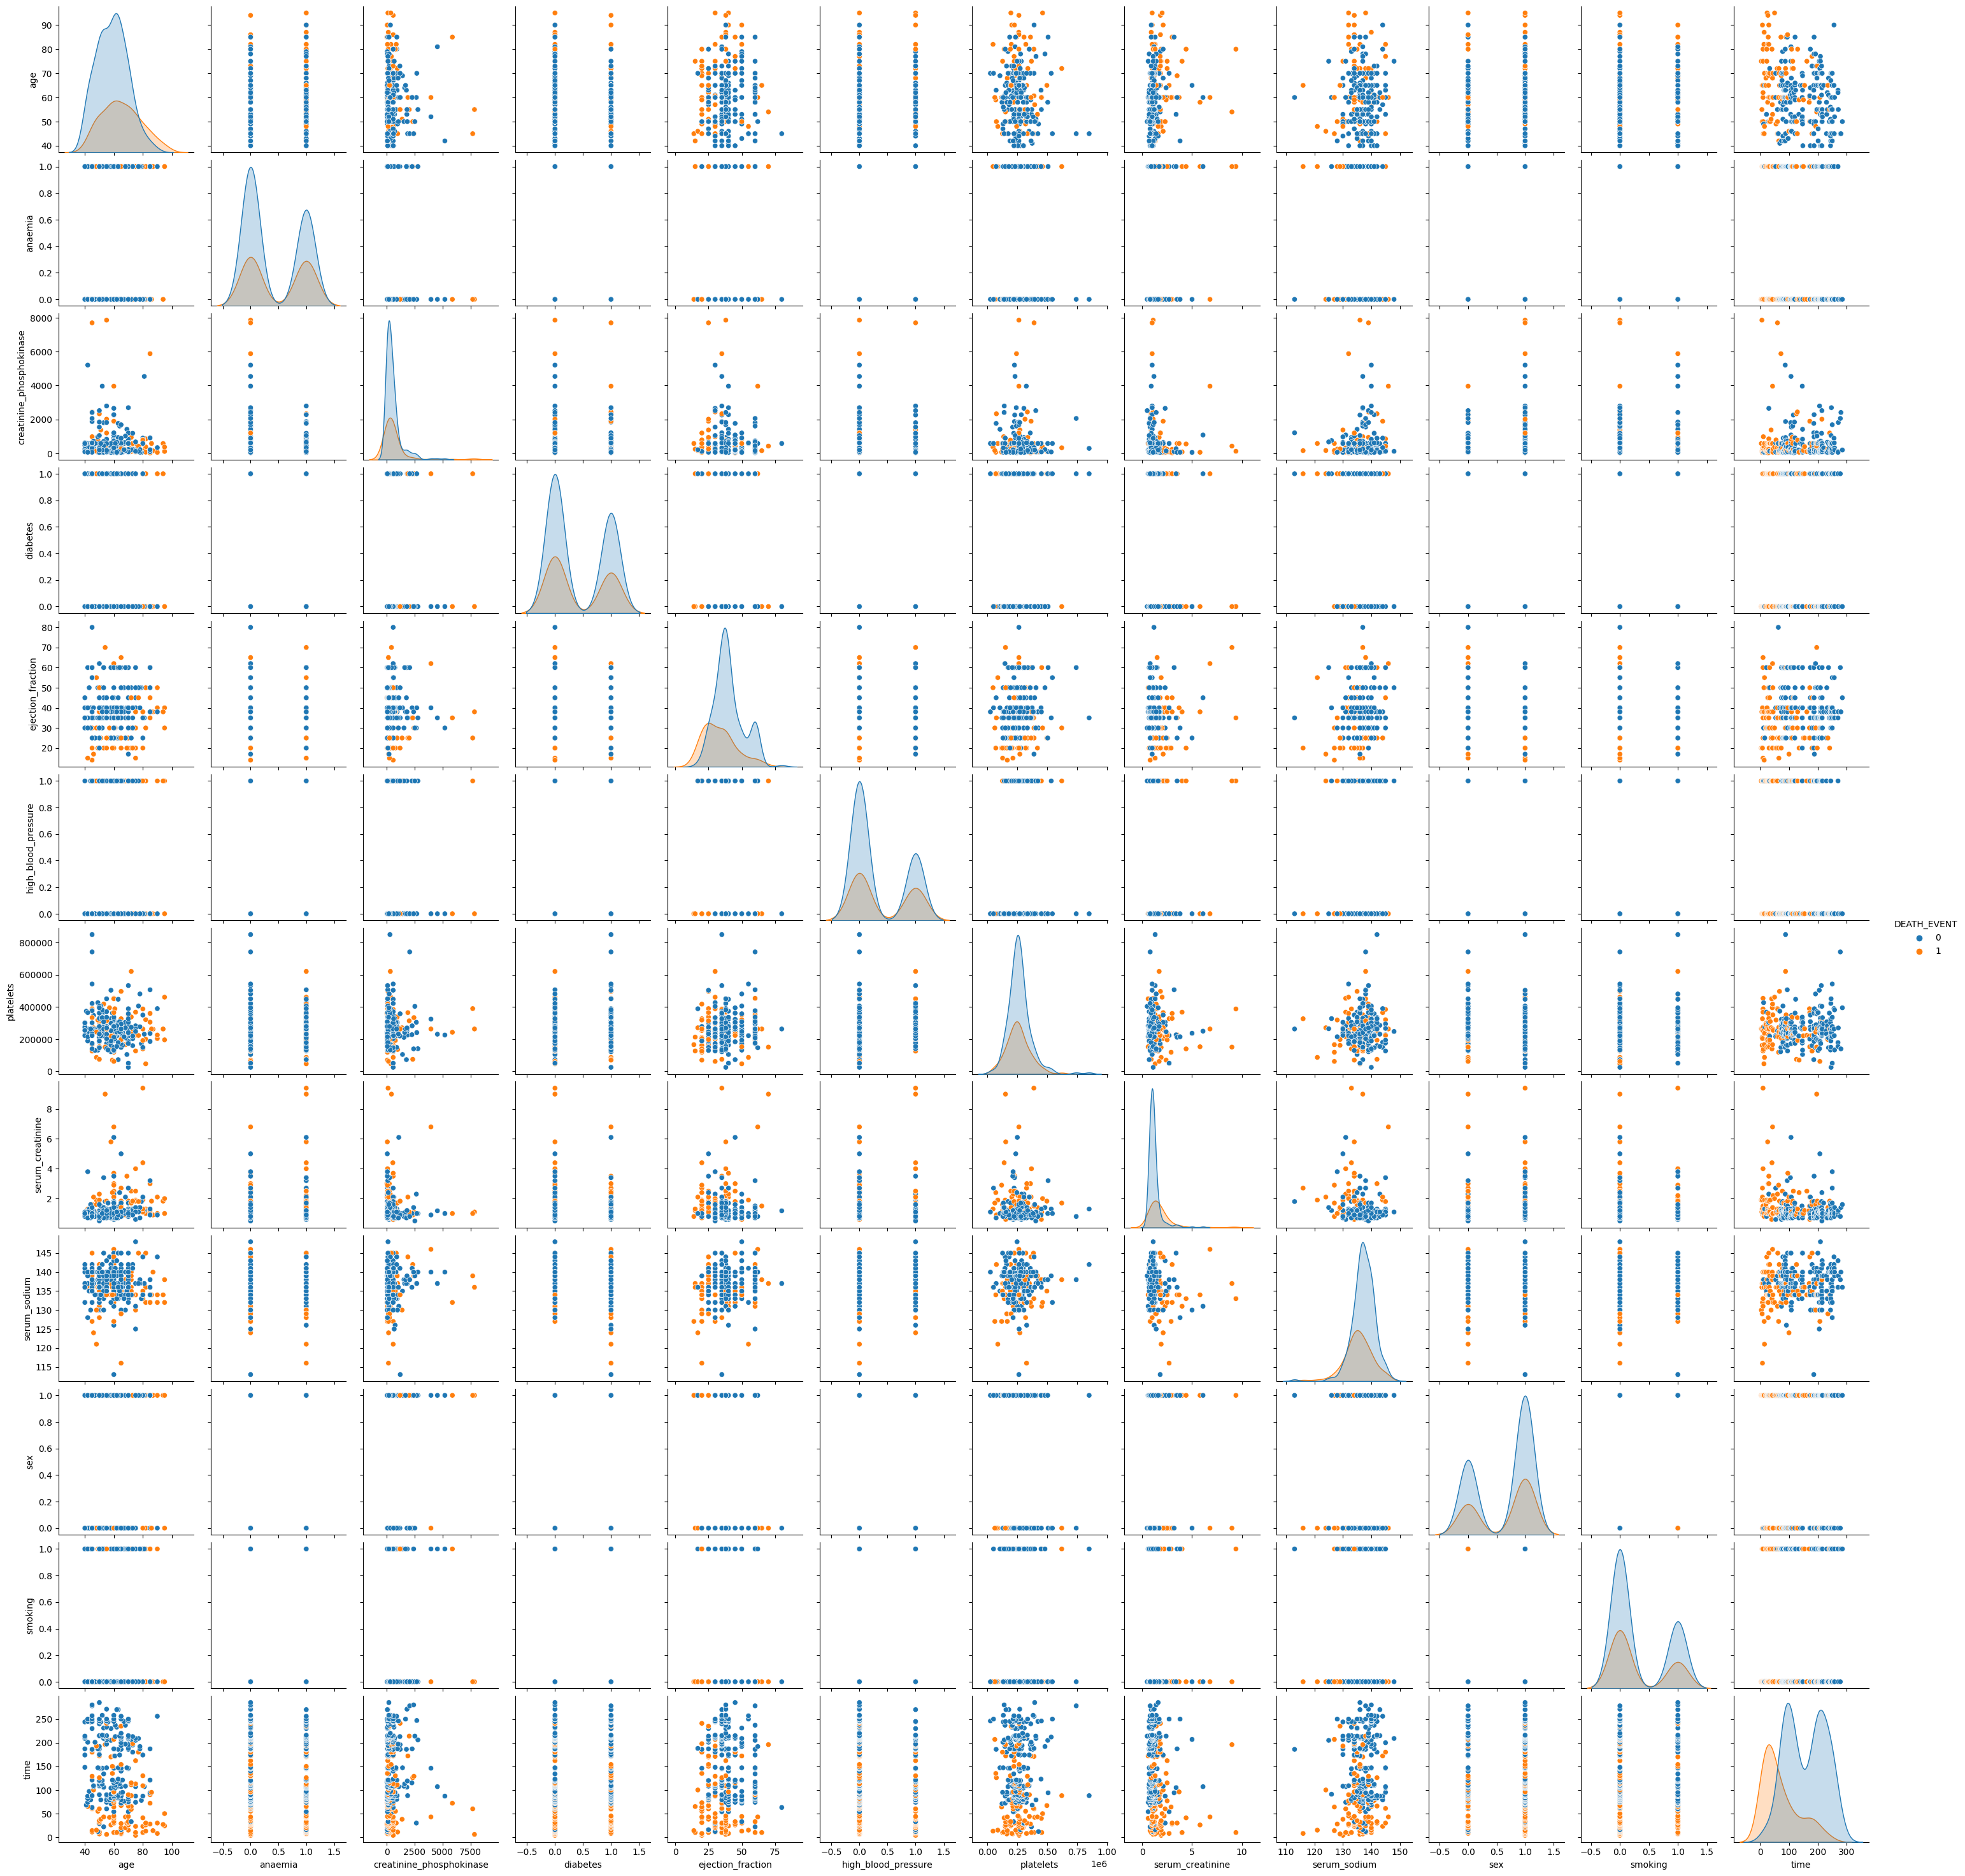

In [17]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
sns.pairplot(data, hue='DEATH_EVENT')

In [18]:
from sklearn.svm import SVC

svc2_X = df[['time', 'age']]
svc2_X_train, svc2_X_test, svc2_y_train, svc2_y_test = train_test_split(svc2_X, y, test_size=0.25, random_state=1)
svc2_X_train = svc2_X_train.to_numpy()
svc2_y_train = svc2_y_train.to_numpy()
h = 0.02
C = 1.0

svc2 = SVC(kernel='linear', C=C).fit(svc2_X_train, svc2_y_train)

svc2_y_pred = svc2.predict(svc2_X_test)
acc = accuracy_score(svc2_y_test, svc2_y_pred)
print(f"SVM Test Accuracy: {acc}")

x_min, x_max = svc2_X_train[:, 0].min() - 1, svc2_X_train[:, 0].max() + 1
y_min, y_max = svc2_X_train[:, 1].min() - 1, svc2_X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVM Test Accuracy: 0.8666666666666667


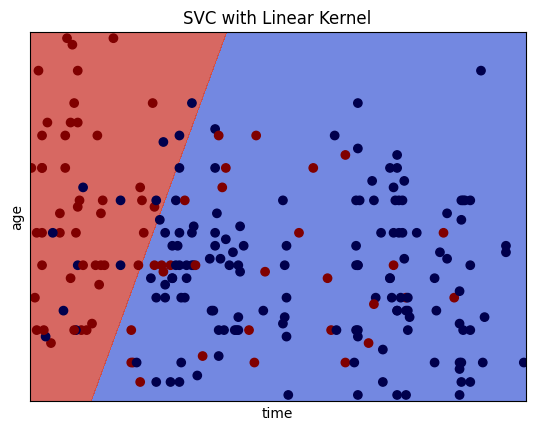

In [19]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(svc2_X_train[:, 0], svc2_X_train[:, 1], c=svc2_y_train, cmap='seismic')
plt.xlabel('time')
plt.ylabel('age')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with Linear Kernel')

plt.show()

### Grid Search

Grid search is an organized method of selecting the optimal hyperparameters for a given model which works by evaluating the model with every combination of specified values and selecting the best one. In this case, we chose to find the best options for the SVM's kernel, gamma value or kernel coefficient, and C value or regularization parameter.

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'kernel': ['linear', 'poly', 'rbf'], 'gamma': [0.1, 1, 2, 5, 10, 25, 100], 'C': [0.1, 1, 2, 5, 10, 25, 100]}

svc = SVC()
grid = GridSearchCV(svc, parameters, refit=True)
grid.fit(norm_X_train, norm_y_train)
print('')

In [21]:
print(f"Best SVM Parameters: {grid.best_params_}")
svc_y_pred = grid.predict(norm_X_test)
acc = accuracy_score(norm_y_test, svc_y_pred)
print(f"Best SVM Test Accuracy: {acc}")

Best SVM Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best SVM Test Accuracy: 0.84


## Decision Tree

The decision tree classifier is another algorithm which we thought would be intriguing to work with given not only its well-documented success over a variety of use cases (especially in the context of the random forest and XGBoost classifiers), but also the way in which we are able to visualize how the algorithm goes through the classification process after it has been trained. In order to build the tree, we chose to use the CART algorithm which relies on the gini index as a metric to assess the entropy and quality of each split. (https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=4)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, dtc_y_pred)
print(f"Decision Tree Test Accuracy: {acc}")

Decision Tree Test Accuracy: 0.8666666666666667


In [92]:
importances = dtc.feature_importances_
for i in range(len(list(X.columns))):
  coeff = f"{list(X.columns)[i]} Importance: {round(importances[i], 4)}"
  if importances[i] != 0:
    print(coeff)

age Importance: 0.0195
ejection_fraction Importance: 0.0649
platelets Importance: 0.0122
serum_creatinine Importance: 0.1252
serum_sodium Importance: 0.0691
time Importance: 0.709


As shown above, time and serum_creatinine were regarded as the most important features used by the decision tree to make its predictions on whether a patient would survive or not, supporting our findings from last time yet again.

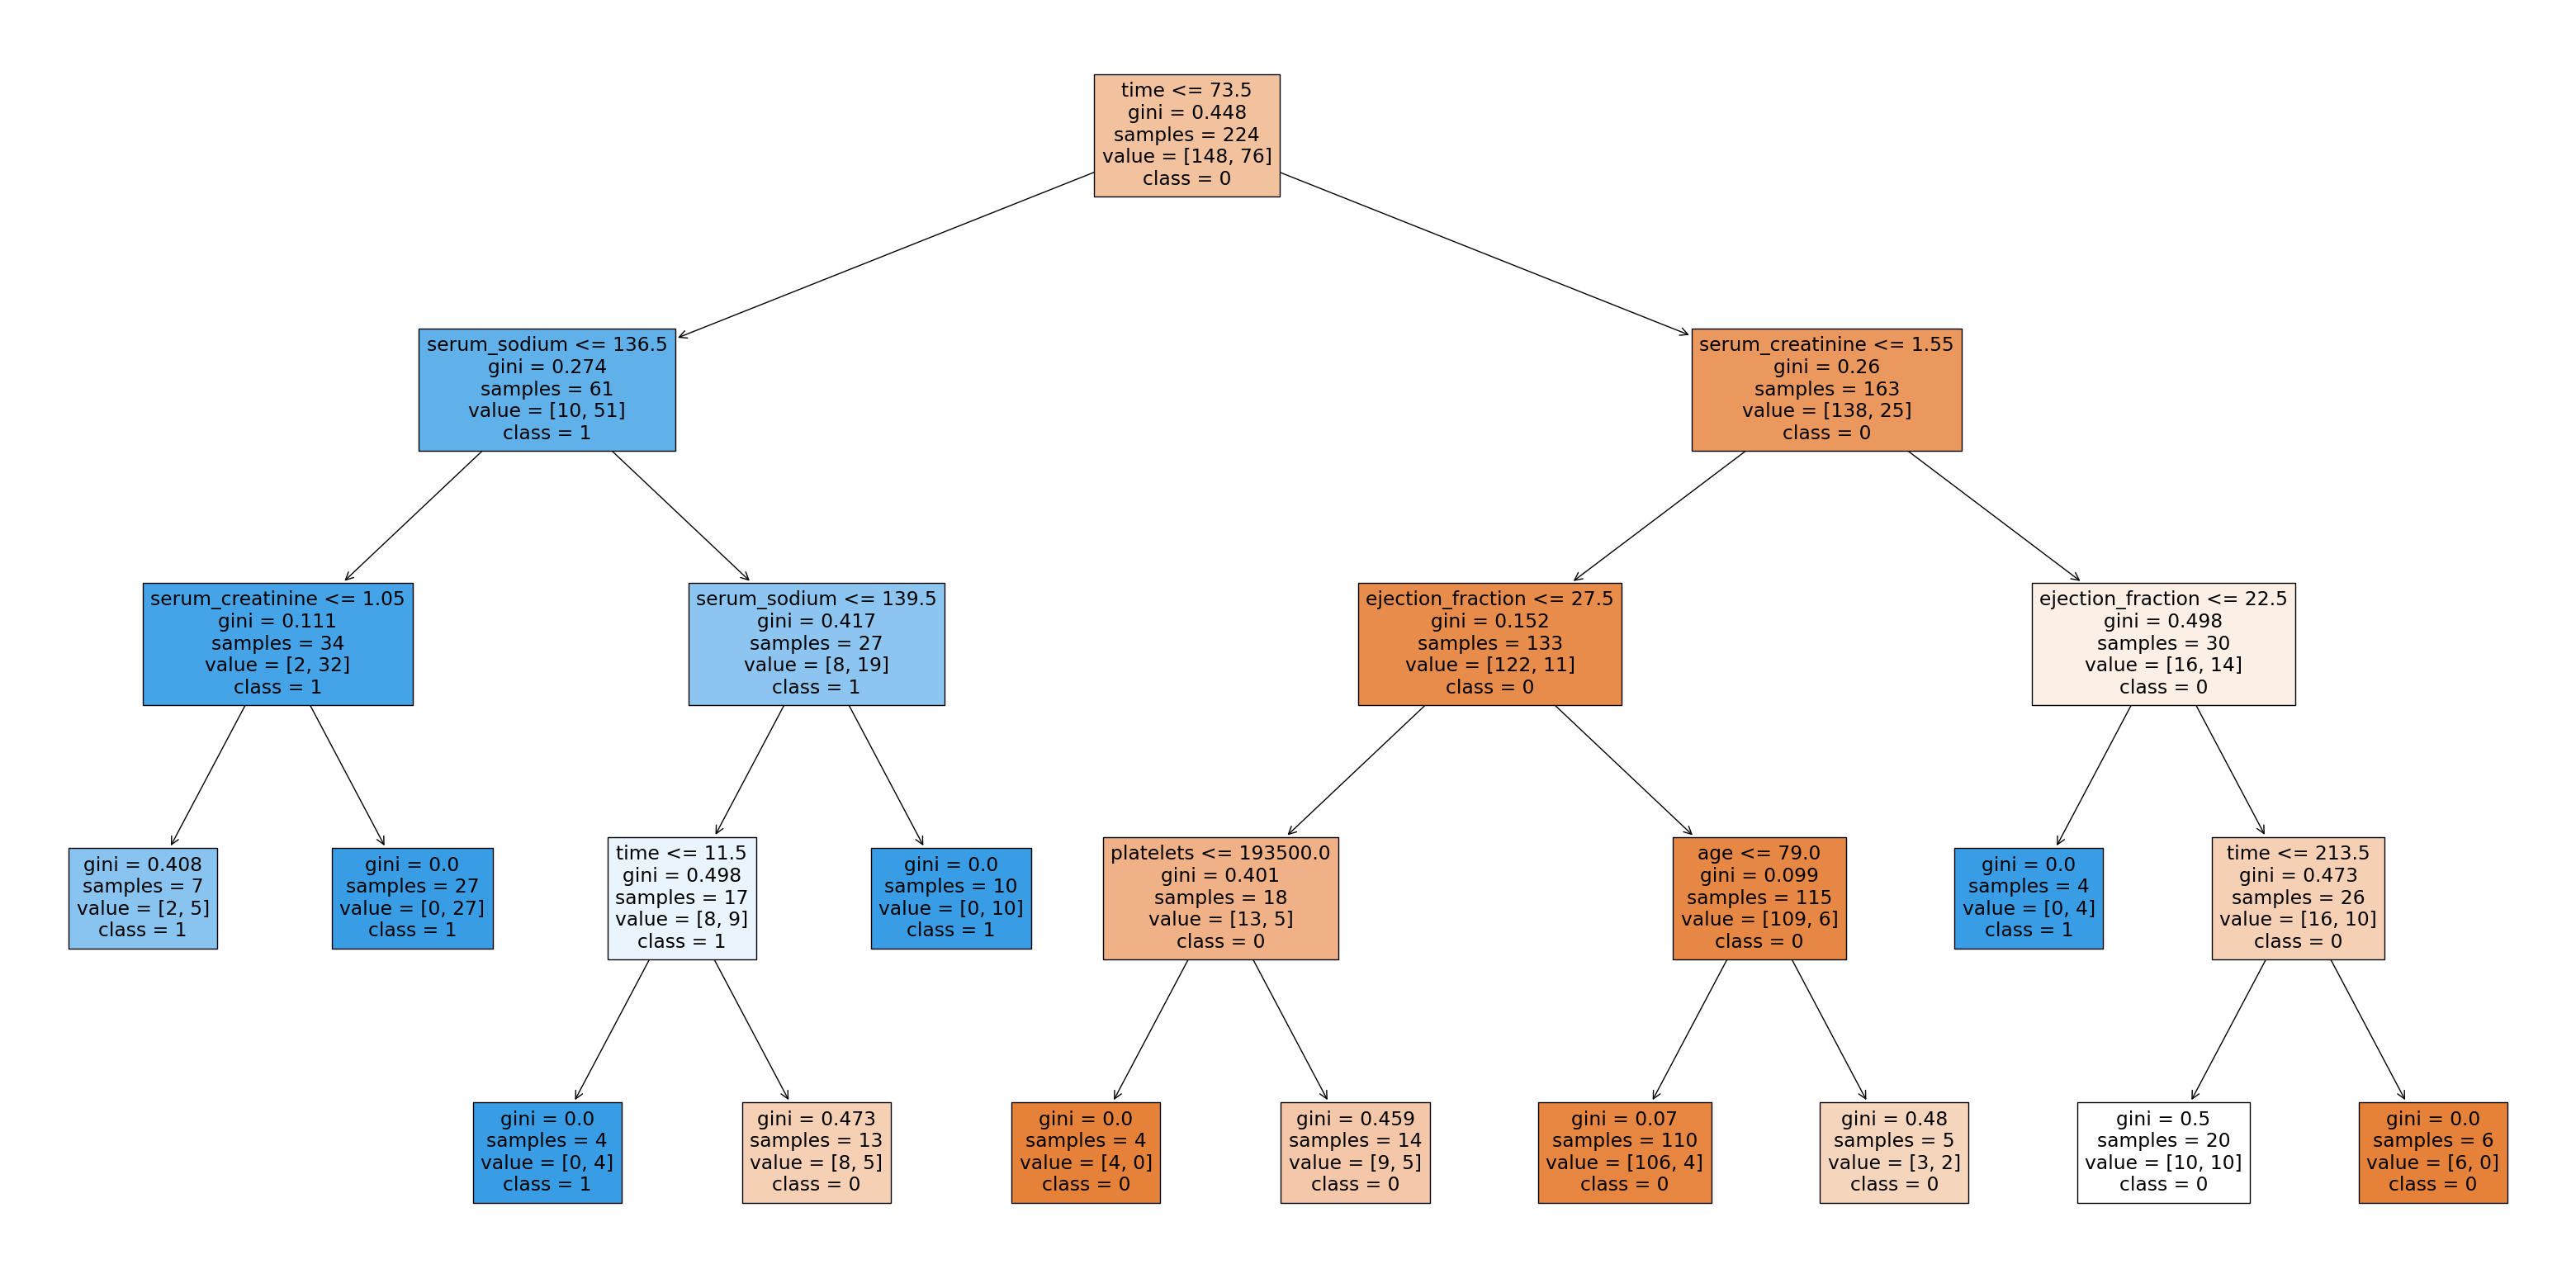

In [93]:
from sklearn import tree

fig = plt.figure(figsize=(40, 20))
_ = tree.plot_tree(dtc, feature_names=X.columns, class_names=['0', '1'], filled=True)

## Neural Network

We also thought it would be interesting to model our data with a simple neural network since neural networks are quite effective in modeling more complex relationships similar to what we have here where the data is not only multi-dimensional, but largely non-linear as well. We trained both a pre-built multi-layer perceptron (MLP) and a simple neural network manually built using the Keras framework for the purpose of our classification task.

In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', solver='sgd')
mlp.fit(X_train, y_train)
print(f"MLP Test Accuracy: {mlp.score(X_test, y_test)}")

MLP Test Accuracy: 0.7333333333333333


In [41]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(12,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(norm_X_train, norm_y_train, epochs=30, batch_size=32, validation_data=(norm_X_test, norm_y_test), verbose=0)

Final NN Train Loss: 0.33598923683166504
Final NN Validation Loss: 0.31552383303642273


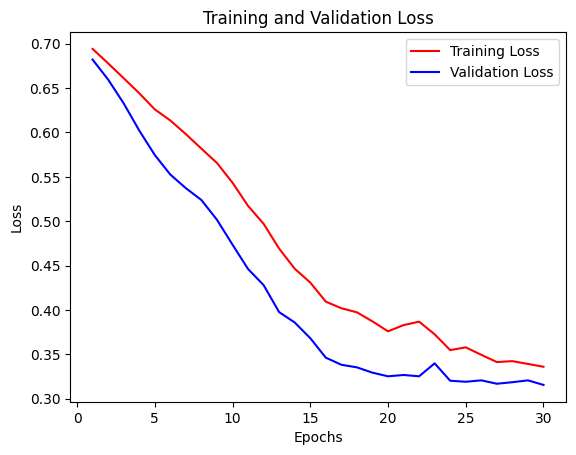

In [43]:
loss = history.history['loss']
print(f"Final NN Train Loss: {loss[-1]}")
val_loss = history.history['val_loss']
print(f"Final NN Validation Loss: {val_loss[-1]}")

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Final NN Train Accuracy: 0.8392857313156128
Final NN Validation Accuracy: 0.8799999952316284


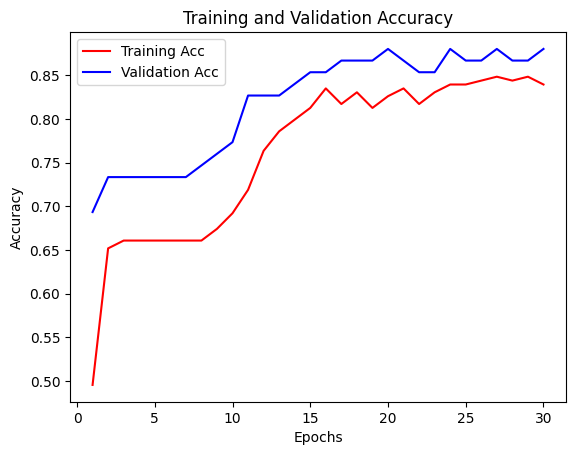

In [44]:
acc = history.history['accuracy']
print(f"Final NN Train Accuracy: {acc[-1]}")
val_acc = history.history['val_accuracy']
print(f"Final NN Validation Accuracy: {val_acc[-1]}")

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Altogether, we came across some interesting findings in our experimentation with the two models. First off, we found that with the MLP, the choice of activation function for the hidden layers did not play much of a role in changing the accuracy, but the choice of optimizer certainly did. Interestingly, though, while stochastic gradient descent worked well for the MLP, it was pretty unsuitable for the Keras model which is why we settled on the Adam optimizer. For the Keras model, we also saw that the model quickly overfits at around the 30 epoch mark and even sooner when using a larger batch size, both of which provide some rationale for why we chose the hyperparameters we did. Another point of interest which we were not exactly sure about was why the model's validation accuracy and loss were better than its training counterparts, but apparently the phenomenon is quite common and points to the probability distribution of the two partitioned datasets.

In order to improve the Keras model's accuracy even further, some avenues of exploration we came up with involve modifying the optimizer's learning rate, adding new layers to the model, and playing around with the number of connections in each dense layer.

## Conclusions

After training the various classifiers on our data for a second time, we learned that a simple neural network performs the best on the testing data with logistic regression as a close second. The performance of the models was measured by their ability to predict deaths in patients with heart failure based on multiple attributes. However, since the dataset which we used was not very large to begin with, we once again cannot conclusively say that any of these classifiers would outperform the others with a more robust dataset, nor can we generalize the results to the real world.